<a href="https://colab.research.google.com/github/Kabzel55/Cats_vs_dogs/blob/master/Cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
rm -rf /content/*

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%bash
pwd
wget -- output-document=cats_and_dogs.zip --quiet https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/cats_and_dogs/dogs-vs-cats.zip
ls

In [ ]:
%%bash
unzip dogs-vs-cats.zip

rm -rf sampleSubmission.csv

unzip -q train.zip -d /content/kaggle_original_data
rm -rf train.zip
cp /content/kaggle_original_data/train/* /content/kaggle_original_data/
rm -rf /content/kaggle_original_data/train

unzip -q /content/test1.zip
ls

In [ ]:
def make_accuracy_plot(history):
        acc,val_acc = history.history['accuracy'], history.history['val_accuracy']
        epochs = range(1, len(acc)+1)
        plt.figure(figsize=(10,8))
        plt.plot(epochs,acc,label='train accuracy', marker='o')
        plt.plot(epochs,val_acc,label='validation accuracy', marker='o')
        plt.legend()
        plt.title('train and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.show()


def make_loss_plt(history):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1,len(loss)+1)
    plt.figure(figsize=(10,8))
    plt.plot(epochs,loss,label='train loss', marker='o')
    plt.plot(epochs,val_loss,label='validation loss', marker='o')
    plt.legend()
    plt.title('train and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()


def display_augmented_images(directory,index):
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[index]
    img = image.load_img(img_path, target_size=(150,150)) 

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 1
    plt.figure(figsize=(20,14))
    for batch  in datagen.flow(x,batch_size=1):
        plt.subplot(3,4,i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break 

In [ ]:
original_dataset_dir = '/content/kaggle_original_data'
base_dir = '/content/cats_and_dogs'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

for directory in (train_dir, valid_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

dirs = [train_cats_dir, train_dogs_dir, valid_cats_dir, valid_dogs_dir, test_cats_dir, test_dogs_dir]

for directory in dirs:
    if not os.path.exists(directory):
        os.mkdir(directory)



In [ ]:
#CATS ---------------------------------------------------------
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'cat.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'cat.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

#DOGS-------------------------------------------------------

fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('cats: train dir ', len(os.listdir(train_cats_dir)))
print('cats: validation dir', len(os.listdir(valid_cats_dir)))
print('cats: test dir', len(os.listdir(test_cats_dir)))

print('dogs: train dir ', len(os.listdir(train_dogs_dir)))
print('dogs: validation dir', len(os.listdir(valid_dogs_dir)))
print('dogs: test dir', len(os.listdir(test_dogs_dir)))


Using TensorFlow backend.


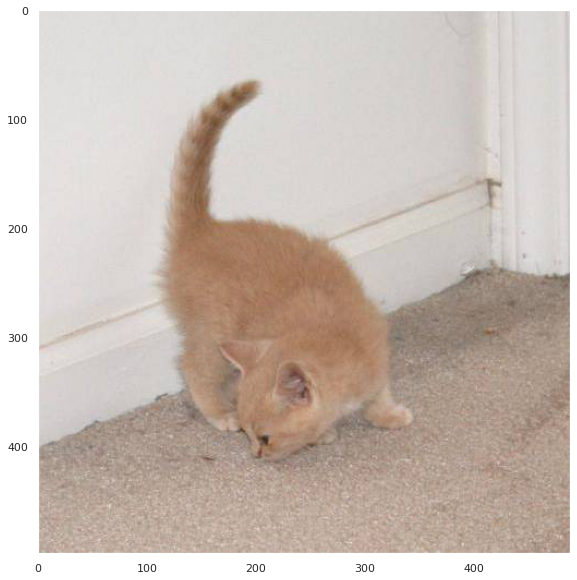

In [ ]:
from keras.preprocessing import image

index = 447 #@param {type:'slider', min:0, max:999}
img_path = '/content/cats_and_dogs/train/cats/cat.' + str(index)+'.jpg'

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)

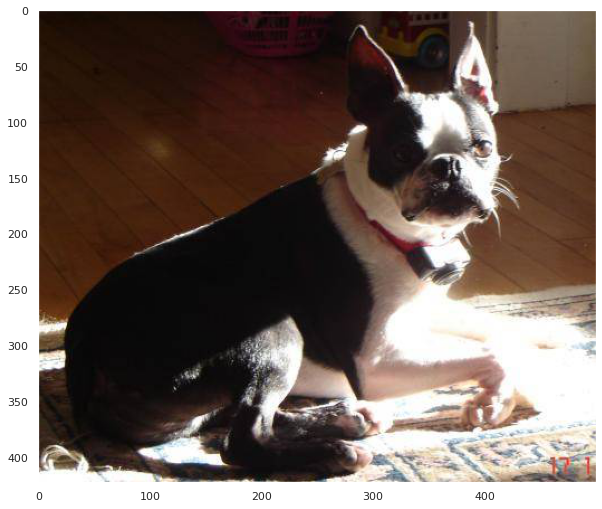

In [ ]:
index = 643 #@param {type:'slider', min:0, max:999}
img_path = '/content/cats_and_dogs/train/dogs/dog.' + str(index)+'.jpg'

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()


In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss ='binary_crossentropy', metrics=['accuracy'] )

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.)
valid_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150,150),batch_size = 20, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir, target_size=(150,150),batch_size = 20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ',data_batch.shape )
    print('labels data batch shape', labels_batch.shape)
    break

In [ ]:
import time

tic = time.time()
history = model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=30, validation_data=valid_generator, validation_steps=50)

toc = time.time()
print(f'time: {toc - tic}')
model.save('cats_and_dogs_small_1.h5')

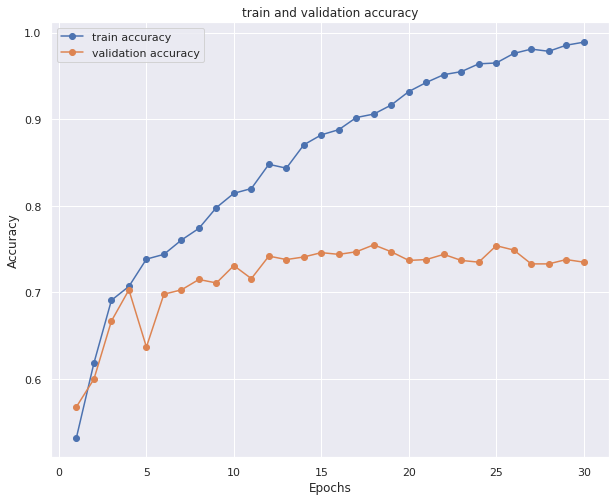

In [ ]:
make_accuracy_plot(history)

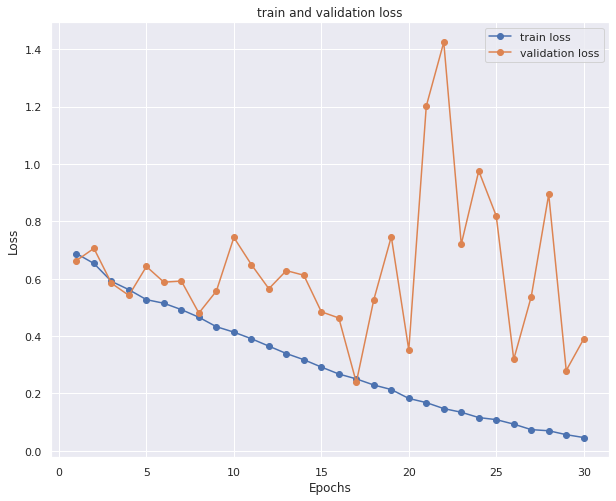

In [ ]:
make_loss_plt(history)

In [ ]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                            shear_range=0.2,zoom_range=0.2, horizontal_flip=True ,fill_mode='nearest' )

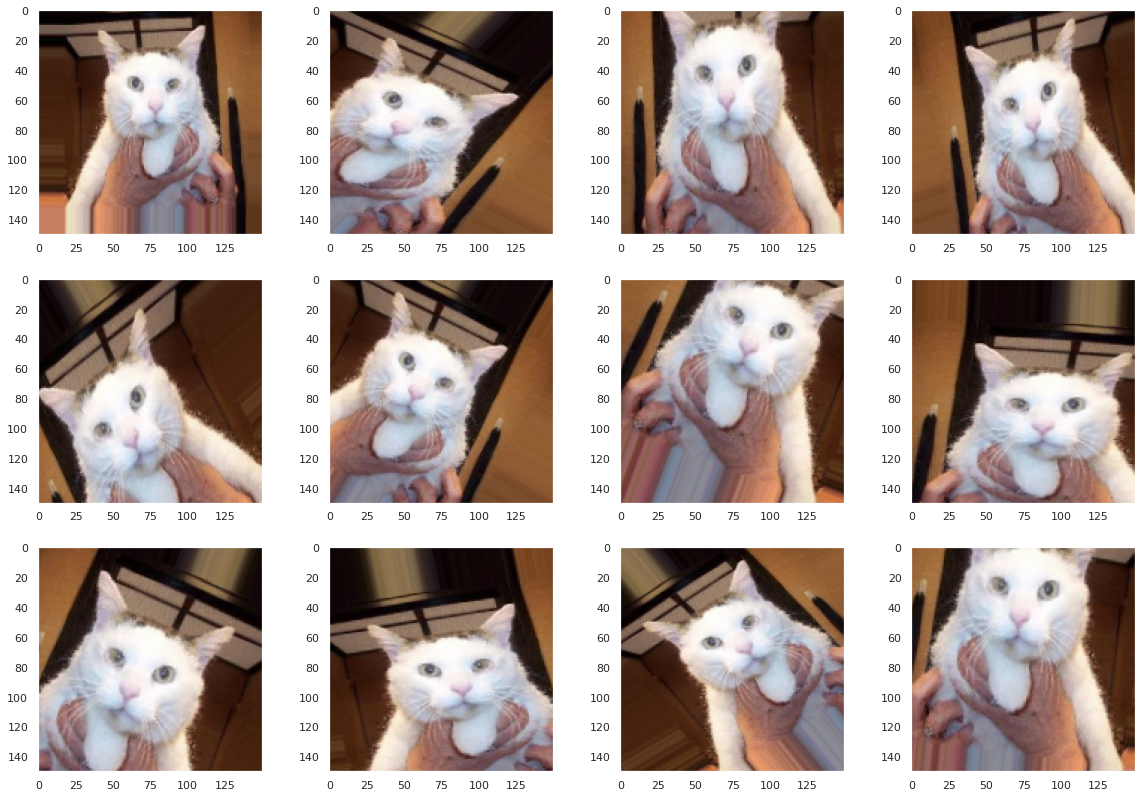

In [ ]:
from keras.preprocessing import image
index = 442 #@param {type:'slider', min:0, max:999}
display_augmented_images(train_cats_dir, index)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.,rotation_range=40,width_shift_range=0.2, height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150,150),batch_size=32, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history=model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=50, validation_data=valid_generator, validation_steps=50)

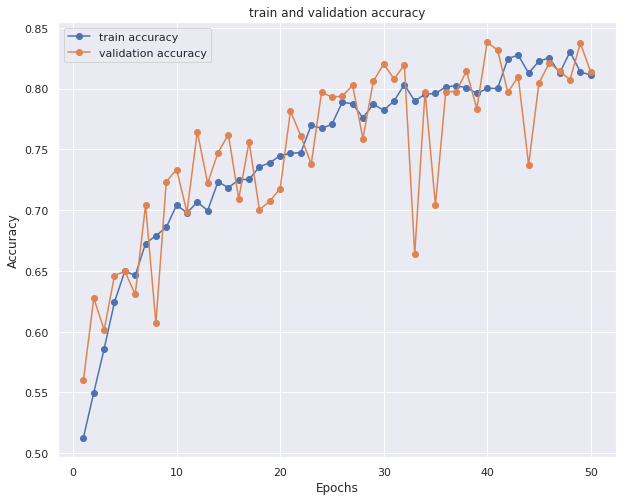

In [ ]:
make_accuracy_plot(history)

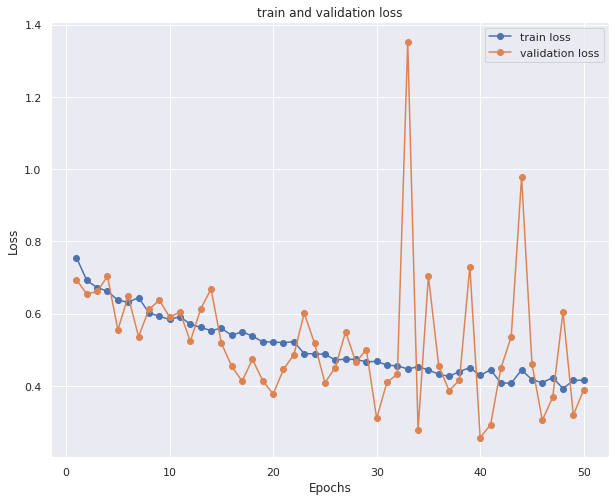

In [ ]:
make_loss_plt(history)

In [ ]:
from keras.applications import  VGG16

conv_base = VGG16(weights='imagenet',include_top = False, input_shape=(150,150,3))
conv_base.summary()

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

In [ ]:
print('przed',len(model.trainable_weights))
conv_base.trainable =  False
print('po',len(model.trainable_weights))

przed 30
po 4


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.,rotation_range=40,width_shift_range=0.2, height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150,150),batch_size=20, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=50,validation_data=valid_generator,validation_steps=50,verbose=2)


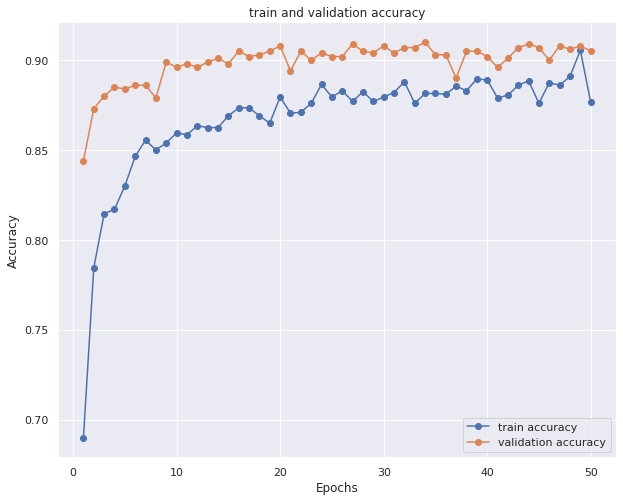

In [ ]:
make_accuracy_plot(history)

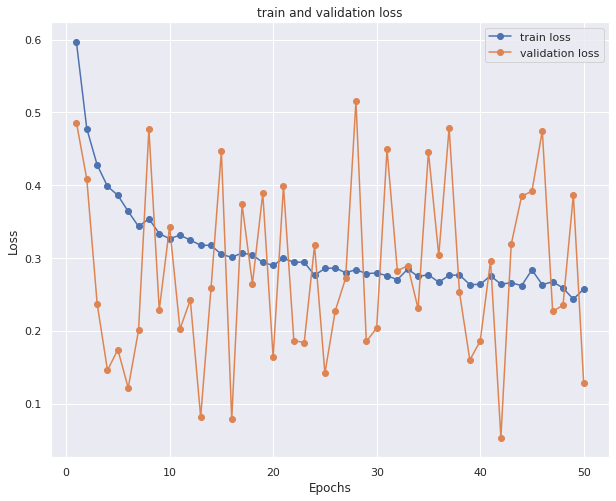

In [ ]:
make_loss_plt(history)